# FC RES Storage结果图代码

In [2]:
import pyswmm
import numpy as np
import pandas as pd
from swmm_api import read_out_file
from swmm_api import output_file
from swmm_api import read_rpt_file
import matplotlib.pyplot as plt
import os

e:\anaconda3\envs\tensorflow-cpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# RSH降雨图

In [2]:
erains=np.load('./Step2_Rainfall_design/RSH/east.npy').tolist()
wrains=np.load('./Step2_Rainfall_design/RSH/west.npy').tolist()
# 转化为数组
ers,wrs=[],[]
for i in range(len(erains)):
    teme,temw=[],[]
    for j in range(len(erains[i])):
        teme.append(float(erains[i][j][1]))
        temw.append(float(wrains[i][j][1]))
    ers.append(teme)
    wrs.append(temw)

ers=np.array(ers)
wrs=np.array(wrs)

In [ ]:
font1 = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':45,
}
fig,ax=plt.subplots(6,2,figsize=(40,30))

for i in range(len(erains)):
    ax[i][0].bar([x for x in range(ers.shape[1])],ers[i,:])
    ax[i][0].set_title('RSH'+str(i+1)+' East rainfall',font=font1)
    ax[i][1].bar([x for x in range(wrs.shape[1])],wrs[i,:])
    ax[i][1].set_title('RSH'+str(i+1)+' West rainfall',font=font1)

    ax[i][0].tick_params(axis='y',labelsize=30)
    ax[i][1].tick_params(axis='y',labelsize=30)
    if i ==5:
        ax[i][0].set_xticks([0,120])
        ax[i][1].set_xticks([0,120])
        ax[i][0].tick_params(axis='x',labelsize=30)
        ax[i][1].tick_params(axis='x',labelsize=30)
        ax[i][0].set_xlabel('Time (hour)',font=font1)
        ax[i][1].set_xlabel('Time (hour)',font=font1)
    else:
        ax[i][0].set_xticks([])
        ax[i][1].set_xticks([])

    if i==2:
        ax[i][0].set_ylabel('Rain intensity (mm/hour)',font=font1)

plt.savefig('./Figs/RSH rainfall.tif',dpi=200,bbox_inches='tight')

## Real rainfall

In [ ]:
rains=np.load('./Step2_Rainfall_design/RealRain/real.npy').tolist()
# 转化为数组
rs=[]
for i in range(len(rains)):
    tem=[]
    for j in range(len(rains[i])):
        tem.append(float(rains[i][j][1]))
    rs.append(tem)

rs=np.array(rs)

In [ ]:
font1 = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':45,
}
fig,ax=plt.subplots(4,1,figsize=(40,30))

for i in range(len(rains)):
    ax[i].bar([x for x in range(rs.shape[1])],rs[i,:])
    ax[i].set_title('RR'+str(i+1)+' Real rainfall',font=font1)

    ax[i].tick_params(axis='y',labelsize=30)
    if i == 3:
        ax[i].set_xticks([0,120])
        ax[i].tick_params(axis='x',labelsize=30)
        ax[i].set_xlabel('Time (hour)',font=font1)
    else:
        ax[i].set_xticks([])

    if i==1:
        ax[i].set_ylabel('Rain intensity (mm/hour)',font=font1)

plt.savefig('./Figs/RR rainfall.tif',dpi=100,bbox_inches='tight')

# FC结果图

## RSH的所有控制过程数据


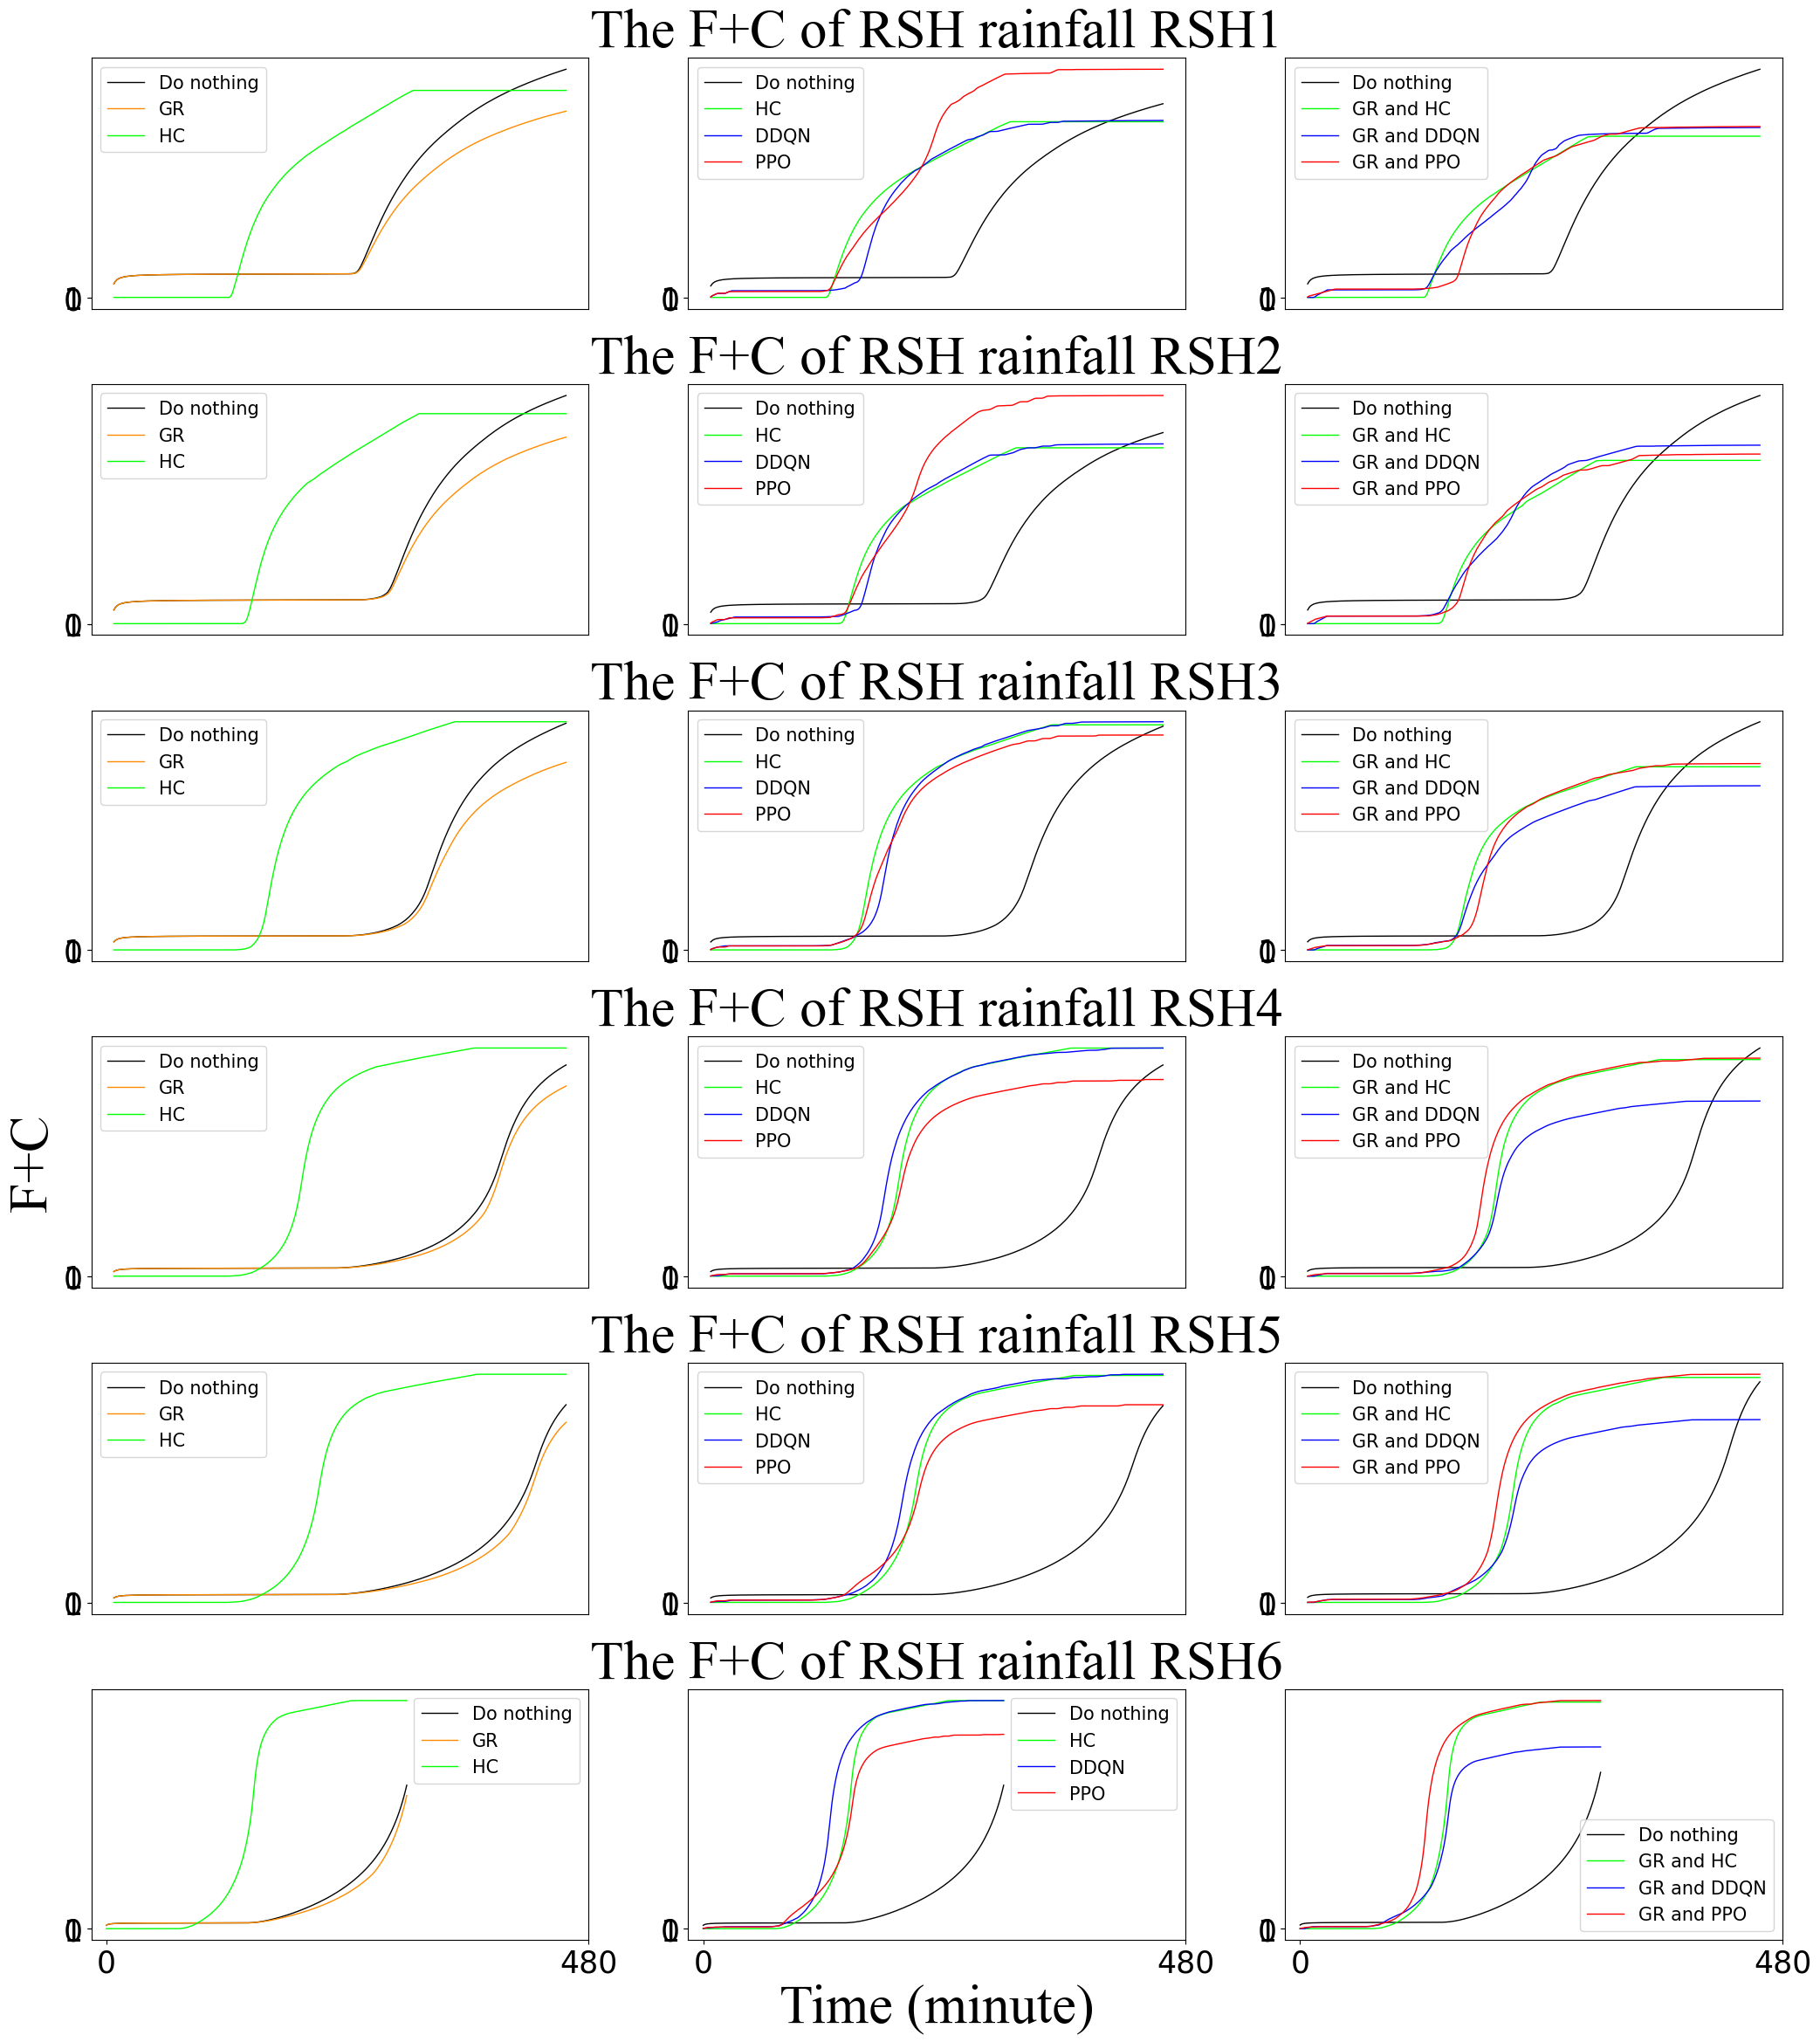

In [3]:
# RSH的所有控制过程数据： S1,3,5,7,9,11

font1 = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':45,
}
items=[['./Step3_1_S1-S8/S12/Results/RSH/','./Step3_1_S1-S8/S34_GR/Results/RSH/','./Step3_1_S1-S8/S56_HC/HC/Results/RSH/'],
       ['./Step3_1_S1-S8/S12/Results/RSH/','./Step3_1_S1-S8/S56_HC/HC/Results/RSH/','./Step4_RTC_PPO_noGI/PPO/Results/RSH/','./Step4_RTC_DDQN_noGI/DDQN/Results/RSH/'],
       ['./Step3_1_S1-S8/S12/Results/RSH/','./Step3_1_S1-S8/S78_GRHC/HC/Results/RSH/','./Step4_RTC_DDQN/DDQN/Results/RSH/','./Step4_RTC_PPO/PPO/Results/RSH/']
]

names=[['Do nothing','GR','HC'],
        ['Do nothing','HC','DDQN','PPO'],
        ['Do nothing','GR and HC','GR and DDQN','GR and PPO']
]
colors=[['#000000','#FF8C00','#00FF00'],
        ['#000000','#00FF00','#0000FF','#FF0000'],
        ['#000000','#00FF00','#0000FF','#FF0000']]
        #['#000000','#FF8C00','#DC143C','#C000C0']]

legends=[['Do nothing','GR','HC'],
         ['Do nothing','HC','DDQN','PPO'],
         ['Do nothing','GR and HC','GR and DDQN','GR and PPO']
]

#legends_log={'S1':False,'S3':False,'S5':False,'S7':False,'S9':False,'S11':False,'S13':False,'S15':False}

fig,ax=plt.subplots(6,3,figsize=(25,28))
for i in range(6):

    #3张图，S1+S3+S5，说明GI与RTC分别作用；S1+S5+S9+S11对比3种RTC；S3+S7+S13+S15单靠GI不好用
    for j in range(3):
        max_num=0.0
        for s in range(len(items[j])):
            
            if './Step3_1_S1-S8/S12/Results/RSH/' in items[j][s] or './Step3_1_S1-S8/S34_GR/Results/RSH/' in items[j][s]:
                 data=np.load(items[j][s]+str(i)+'.npy',allow_pickle=True).tolist()
                 te=np.array(data['F'])+np.array(data['C'])
            else:
                data=np.load(items[j][s]+str(i)+'.npy',allow_pickle=True).tolist()
                te=np.array(data['F'][0:-1:2])+np.array(data['C'][0:-1:2])
            
            #取时均
            #tte=[1 for _ in range(24)]
            #for it in range(24,te.shape[0]-10):
            #    tte.append(np.mean(te[it-10:it+10]))
            #te=np.array(tte)
            ax[i][j].plot(te[:300], label=names[j][s], linewidth=1, color=colors[j][s])
            ax[i][j].legend(fontsize=15)
            #if legends_log[legends[j][s]]:
            #    ax[i][j].plot(te, linewidth=3, color=colors[j][s])
            #else:
            #    ax[i][j].plot(te, label=names[j][s], linewidth=3, color=colors[j][s])
            #    legends_log[legends[j][s]]=True
            max_num=np.max([max_num,np.max(te)])
        #ax[i][j].legend(fontsize=20)
        ax[i][j].tick_params(axis='y',labelsize=25)
        ax[i][j].tick_params(axis='x',labelsize=25)
        if j == 1:
            ax[i][j].set_title('The F+C of RSH rainfall RSH'+str(i+1),font=font1)
        if i == 5:
            ax[i][j].set_xticks([0,480],[0,480])
        else:
            ax[i][j].set_xticks([])
        ax[i][j].set_yticks([0,1],[0,1])

    #fig.legend(fontsize=30,loc='lower center',ncol=8)

    if i==3:
        ax[i][0].set_ylabel('F+C',font=font1)

    if i ==5:
        ax[i][1].set_xlabel('Time (minute)',font=font1)
    
plt.subplots_adjust(hspace=0.3)
plt.savefig('./Figs/FC_RSH.tif',dpi=100,bbox_inches='tight')

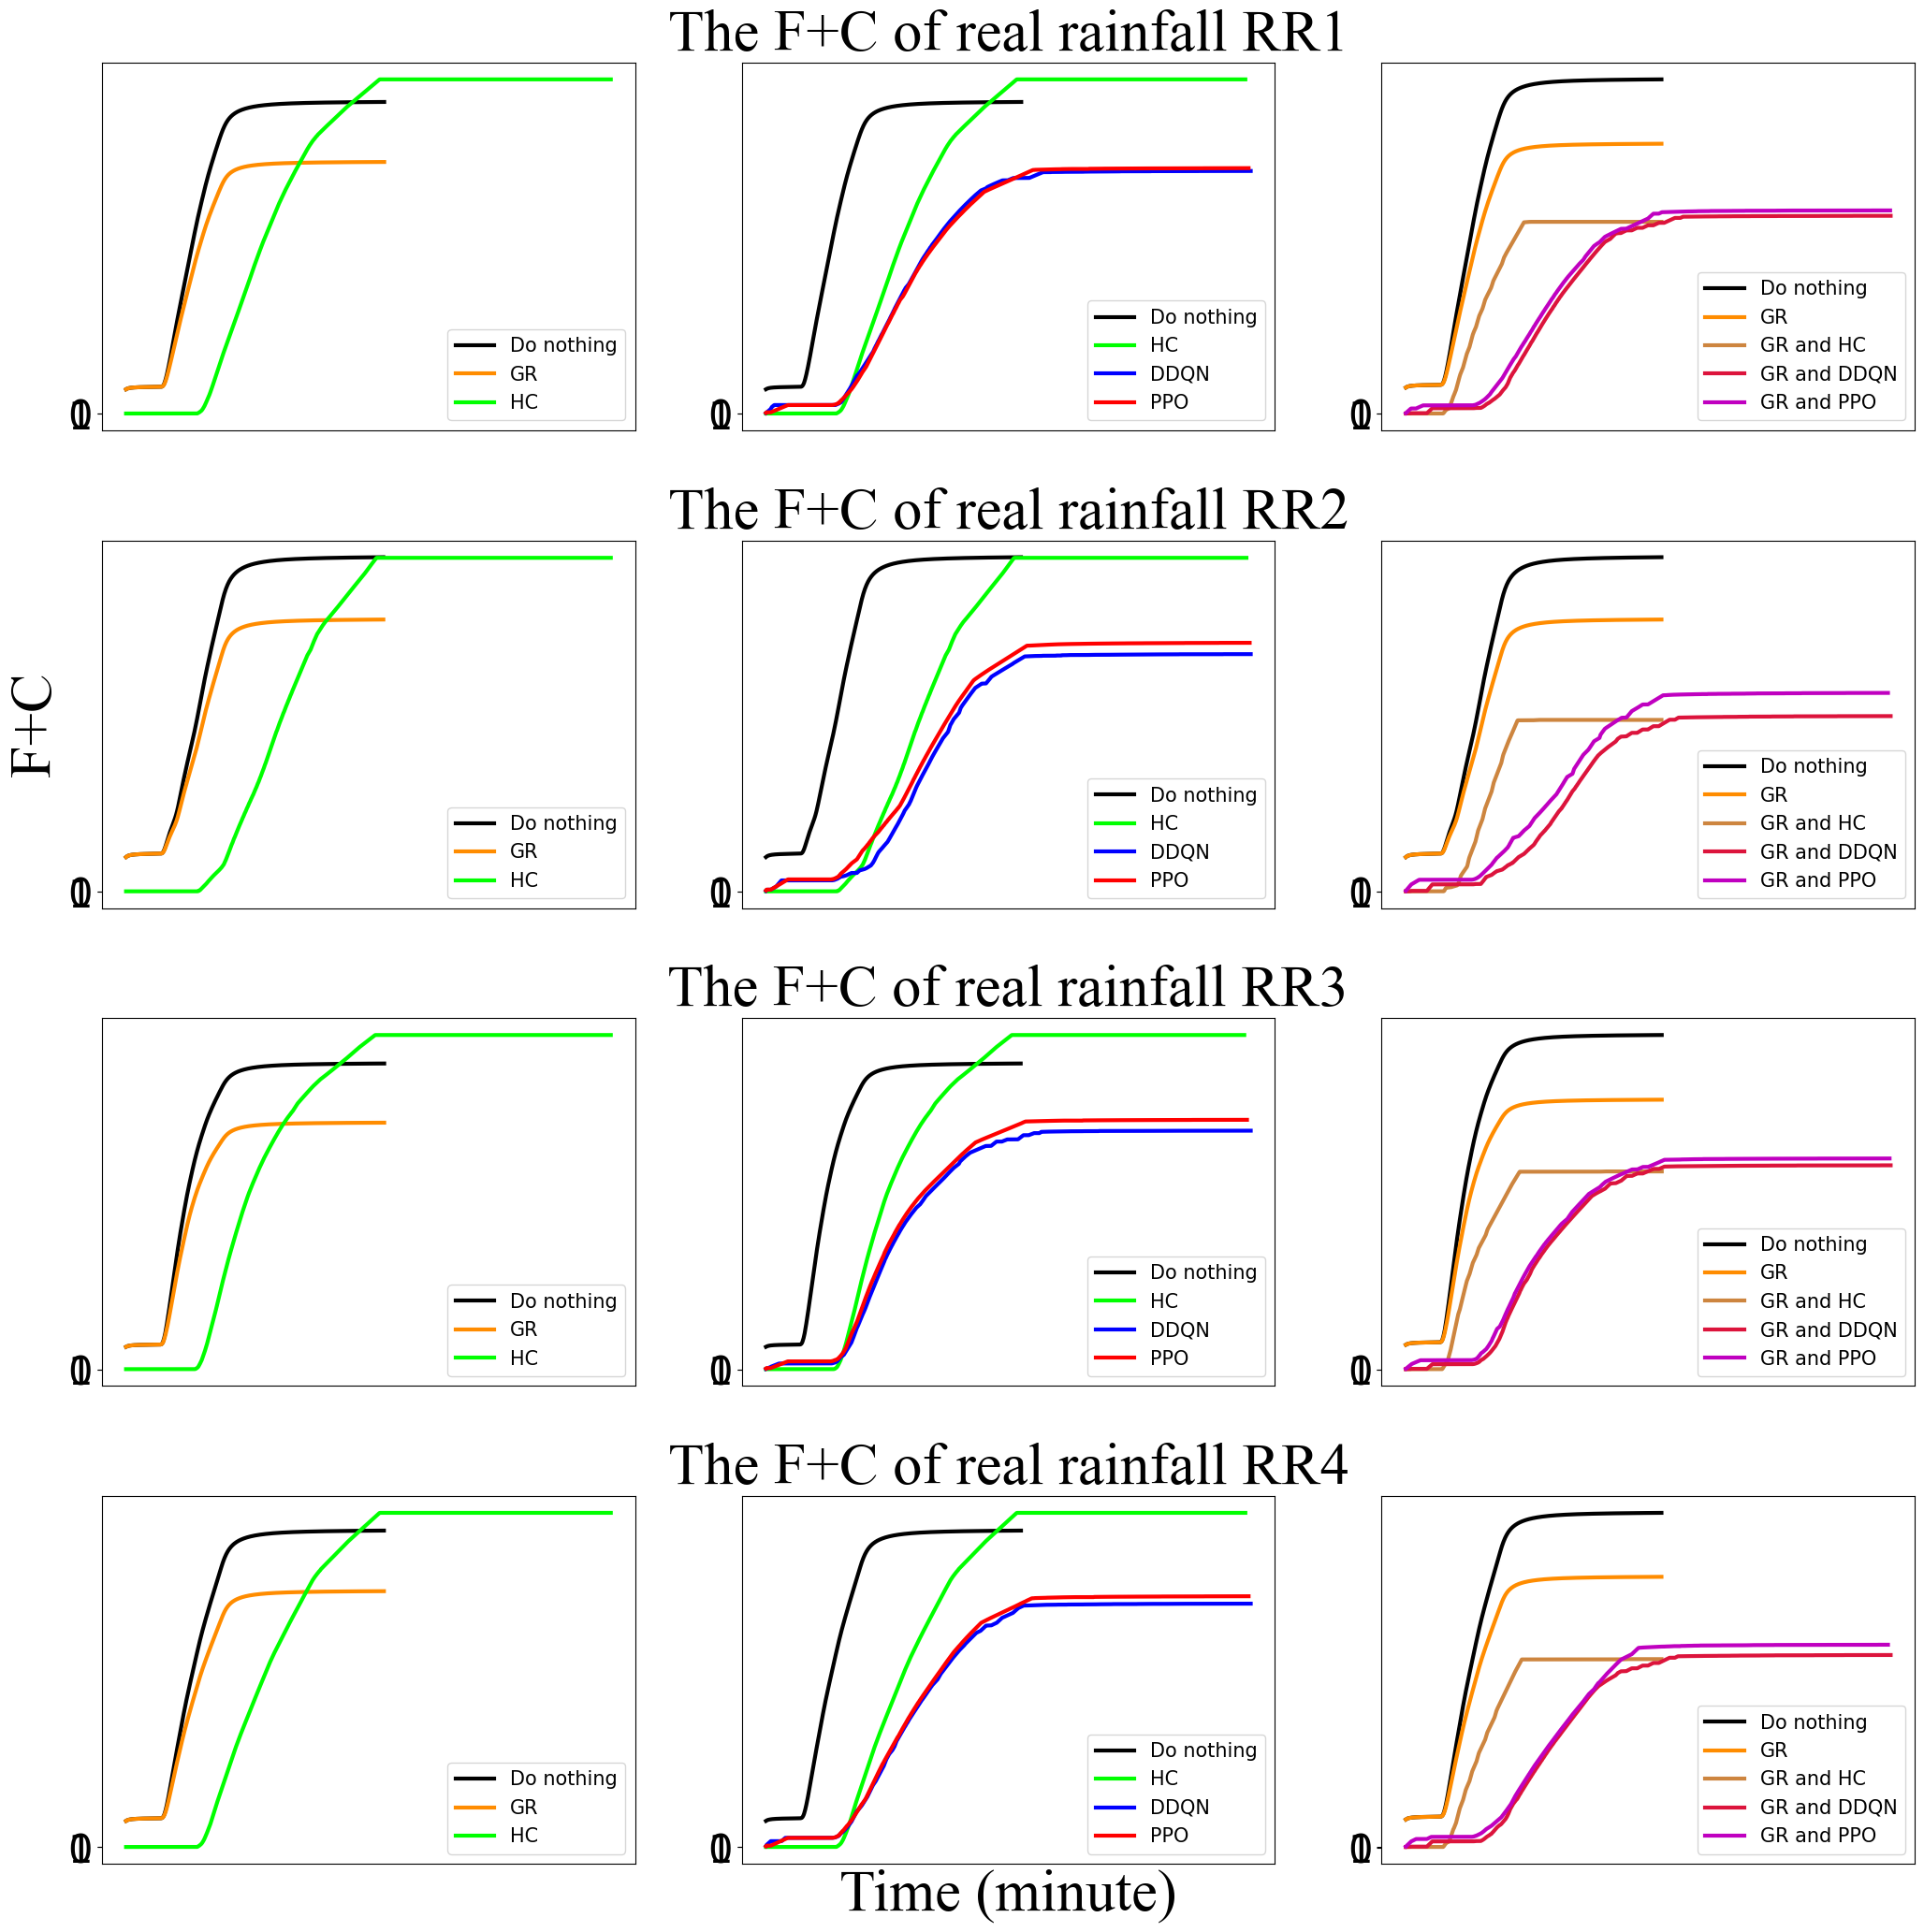

In [20]:
# RR的所有控制过程数据： 
# RR的所有控制过程数据： 

font1 = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':45,
}
items=[['./Step3_1_S1-S8/S12/Results/RR/','./Step3_1_S1-S8/S34_GR/Results/RR/','./Step3_1_S1-S8/S56_HC/HC/Results/RR/'],
       ['./Step3_1_S1-S8/S12/Results/RR/','./Step3_1_S1-S8/S56_HC/HC/Results/RR/','./Step4_RTC_PPO_noGI/PPO/Results/RR/','./Step4_RTC_DDQN_noGI/DDQN/Results/RR/'],
       ['./Step3_1_S1-S8/S12/Results/RR/','./Step3_1_S1-S8/S34_GR/Results/RR/','./Step3_1_S1-S8/S78_GRHC/Results/RR/','./Step4_RTC_DDQN/DDQN/Results/RR/','./Step4_RTC_PPO/PPO/Results/RR/']
]

names=[['Do nothing','GR','HC'],
       ['Do nothing','HC','DDQN','PPO'],
       ['Do nothing','GR','GR and HC','GR and DDQN','GR and PPO']
]
colors=[['#000000','#FF8C00','#00FF00'],
        ['#000000','#00FF00','#0000FF','#FF0000'],
        ['#000000','#FF8C00','#CD853F','#DC143C','#C000C0']]

legends=[['Do nothing','GR','HC'],
         ['Do nothing','HC','DDQN','PPO'],
         ['Do nothing','GR','GR and HC','GR and DDQN','GR and PPO']
]

fig,ax=plt.subplots(4,3,figsize=(25,25))
i,j=0,0
for i in range(4):

    #3张图，S1+S3+S5，说明GI与RTC分别作用；S1+S5+S9+S11对比3种RTC；S3+S7+S13+S15单靠GI不好用
    for j in range(3):
        max_num=0.0
        for s in range(len(items[j])):

            #if items[j][s] =='./Step3_1_S1-S8/S56_HC/HC/Results/RR/' or items[j][s] =='./Step3_1_S1-S8/S78_GRHC/HC/Results/RR/' :
            #     data=np.load(items[j][s]+str(i)+'.npy',allow_pickle=True).tolist()
            #     te=np.array(data['RES'][0:-1:3])
            #else:
            data=np.load(items[j][s]+str(i)+'.npy',allow_pickle=True).tolist()
            te=np.array(data['F'])+np.array(data['C'])
            
            ax[i][j].plot(te, label=names[j][s], linewidth=3, color=colors[j][s])
            ax[i][j].legend(fontsize=15)
            #if legends_log[legends[j][s]]:
            #    ax[i][j].plot(te, linewidth=3, color=colors[j][s])
            #else:
            #    ax[i][j].plot(te, label=names[j][s], linewidth=3, color=colors[j][s])
            #    legends_log[legends[j][s]]=True
            max_num=np.max([max_num,np.max(te)])
        #ax[i][j].legend(fontsize=20)
        ax[i][j].tick_params(axis='y',labelsize=30)
        ax[i][j].tick_params(axis='x',labelsize=30)
        if j == 1:
            ax[i][j].set_title('The F+C of real rainfall RR'+str(i+1),font=font1)
        if i == 5:
            ax[i][j].set_xticks([0,480],[0,480])
        else:
            ax[i][j].set_xticks([])
        ax[i][j].set_yticks([0,1],[0,1])

    #fig.legend(fontsize=30,loc='lower center',ncol=8)

    if i==1:
        ax[i][0].set_ylabel('F+C',font=font1)

    if i ==3:
        ax[i][1].set_xlabel('Time (minute)',font=font1)
    
plt.subplots_adjust(hspace=0.3)
plt.savefig('./Figs/FC_RR.tif',dpi=100,bbox_inches='tight')

# Res结果图

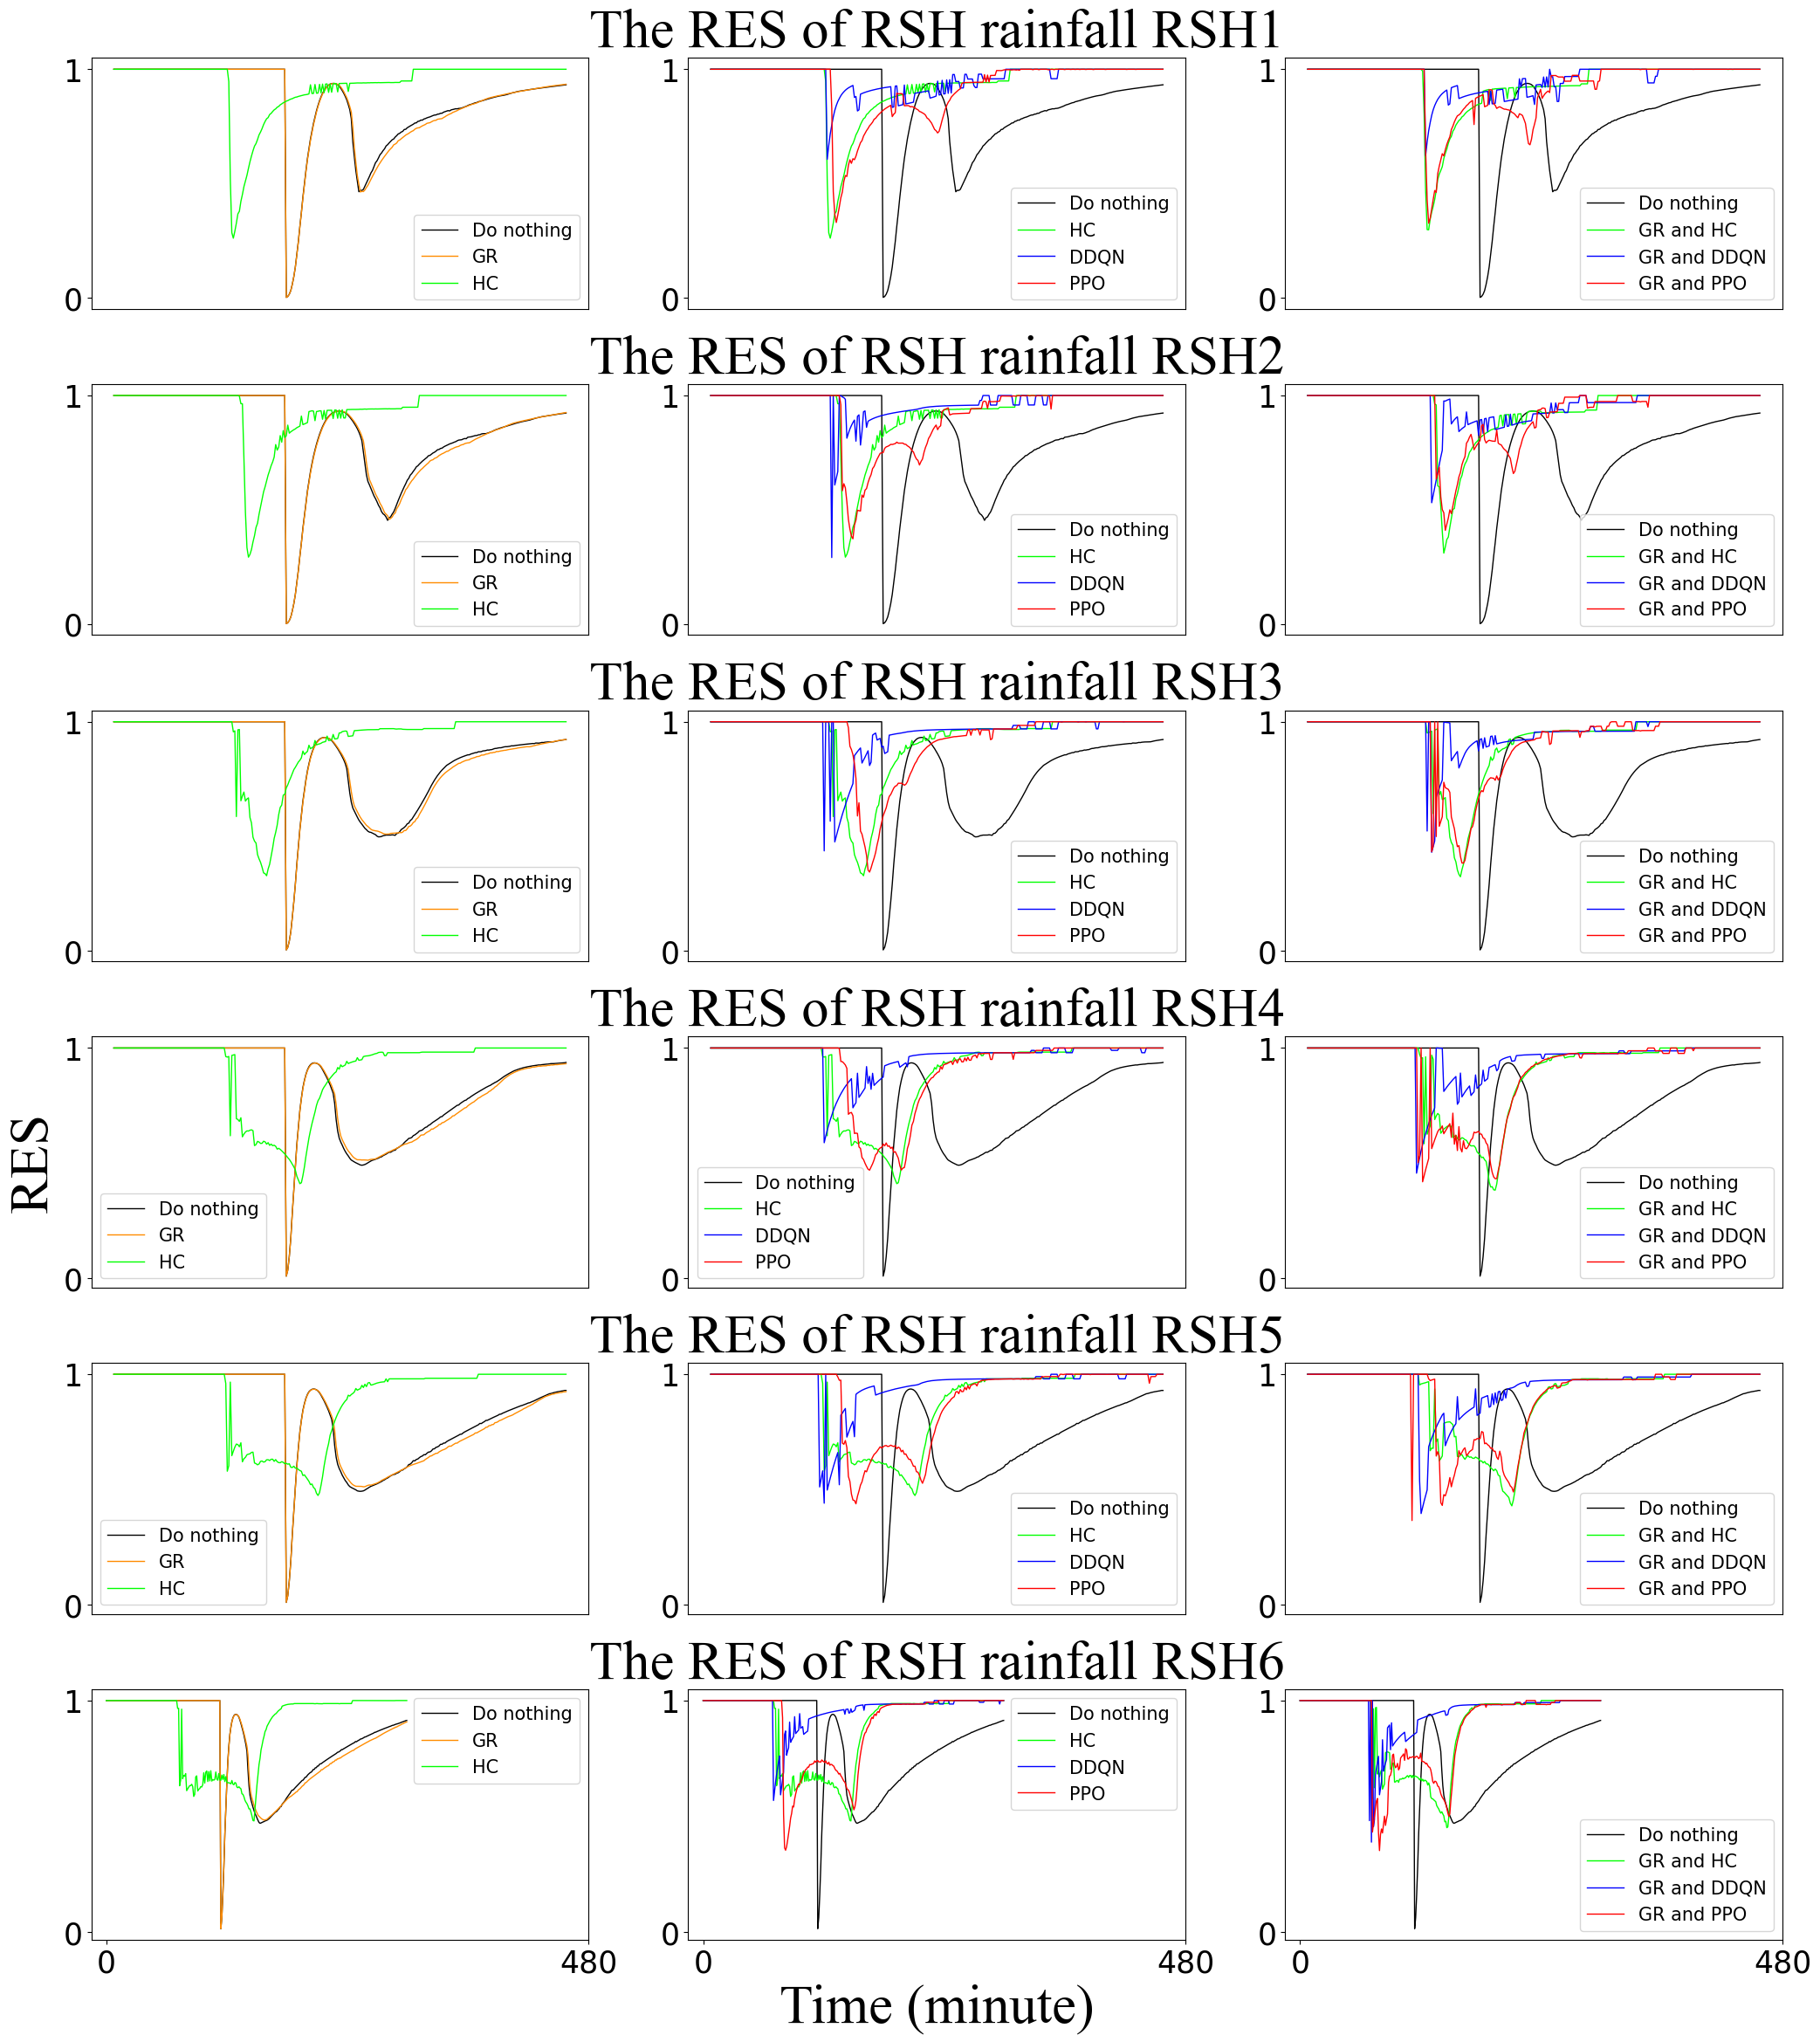

In [8]:
# RSH的所有控制过程数据： S1,3,5,7,9,11

font1 = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':45,
}
items=[['./Step3_1_S1-S8/S12/Results/RSH/','./Step3_1_S1-S8/S34_GR/Results/RSH/','./Step3_1_S1-S8/S56_HC/HC/Results/RSH/'],
       ['./Step3_1_S1-S8/S12/Results/RSH/','./Step3_1_S1-S8/S56_HC/HC/Results/RSH/','./Step4_RTC_DDQN_noGI/DDQN/Results/RSH/','./Step4_RTC_PPO_noGI/PPO/Results/RSH/'],
       ['./Step3_1_S1-S8/S12/Results/RSH/','./Step3_1_S1-S8/S78_GRHC/HC/Results/RSH/','./Step4_RTC_DDQN/DDQN/Results/RSH/','./Step4_RTC_PPO/PPO/Results/RSH/']
]

names=[['Do nothing','GR','HC'],
        ['Do nothing','HC','DDQN','PPO'],
        ['Do nothing','GR and HC','GR and DDQN','GR and PPO']
]
colors=[['#000000','#FF8C00','#00FF00'],
        ['#000000','#00FF00','#0000FF','#FF0000'],
        ['#000000','#00FF00','#0000FF','#FF0000']]
        #['#000000','#FF8C00','#DC143C','#C000C0']]

legends=[['Do nothing','GR','HC'],
         ['Do nothing','HC','DDQN','PPO'],
         ['Do nothing','GR and HC','GR and DDQN','GR and PPO']
]

#legends_log={'S1':False,'S3':False,'S5':False,'S7':False,'S9':False,'S11':False,'S13':False,'S15':False}

fig,ax=plt.subplots(6,3,figsize=(25,28))
for i in range(6):

    #3张图，S1+S3+S5，说明GI与RTC分别作用；S1+S5+S9+S11对比3种RTC；S3+S7+S13+S15单靠GI不好用
    for j in range(3):
        max_num=0.0
        for s in range(len(items[j])):

            if './Step3_1_S1-S8/S12/Results/RSH/' in items[j][s] or './Step3_1_S1-S8/S34_GR/Results/RSH/' in items[j][s]:
                 data=np.load(items[j][s]+str(i)+'.npy',allow_pickle=True).tolist()
                 te=np.array(data['RES'])
            else:
                data=np.load(items[j][s]+str(i)+'.npy',allow_pickle=True).tolist()
                te=np.array(data['RES'][0:-1:2])

            #取时均
            #tte=[1 for _ in range(24)]
            #for it in range(24,te.shape[0]-10):
            #    tte.append(np.mean(te[it-10:it+10]))
            #te=np.array(tte)
            ax[i][j].plot(te[:300], label=names[j][s], linewidth=1, color=colors[j][s])
            ax[i][j].legend(fontsize=15)
            #if legends_log[legends[j][s]]:
            #    ax[i][j].plot(te, linewidth=3, color=colors[j][s])
            #else:
            #    ax[i][j].plot(te, label=names[j][s], linewidth=3, color=colors[j][s])
            #    legends_log[legends[j][s]]=True
            max_num=np.max([max_num,np.max(te)])
        #ax[i][j].legend(fontsize=20)
        ax[i][j].tick_params(axis='y',labelsize=25)
        ax[i][j].tick_params(axis='x',labelsize=25)
        if j == 1:
            ax[i][j].set_title('The RES of RSH rainfall RSH'+str(i+1),font=font1)
        if i == 5:
            ax[i][j].set_xticks([0,480],[0,480])
        else:
            ax[i][j].set_xticks([])
        ax[i][j].set_yticks([0,1],[0,1])

    #fig.legend(fontsize=30,loc='lower center',ncol=8)

    if i==3:
        ax[i][0].set_ylabel('RES',font=font1)

    if i ==5:
        ax[i][1].set_xlabel('Time (minute)',font=font1)
    
plt.subplots_adjust(hspace=0.3)
plt.savefig('./Figs/RES_RSH.tif',dpi=100,bbox_inches='tight')

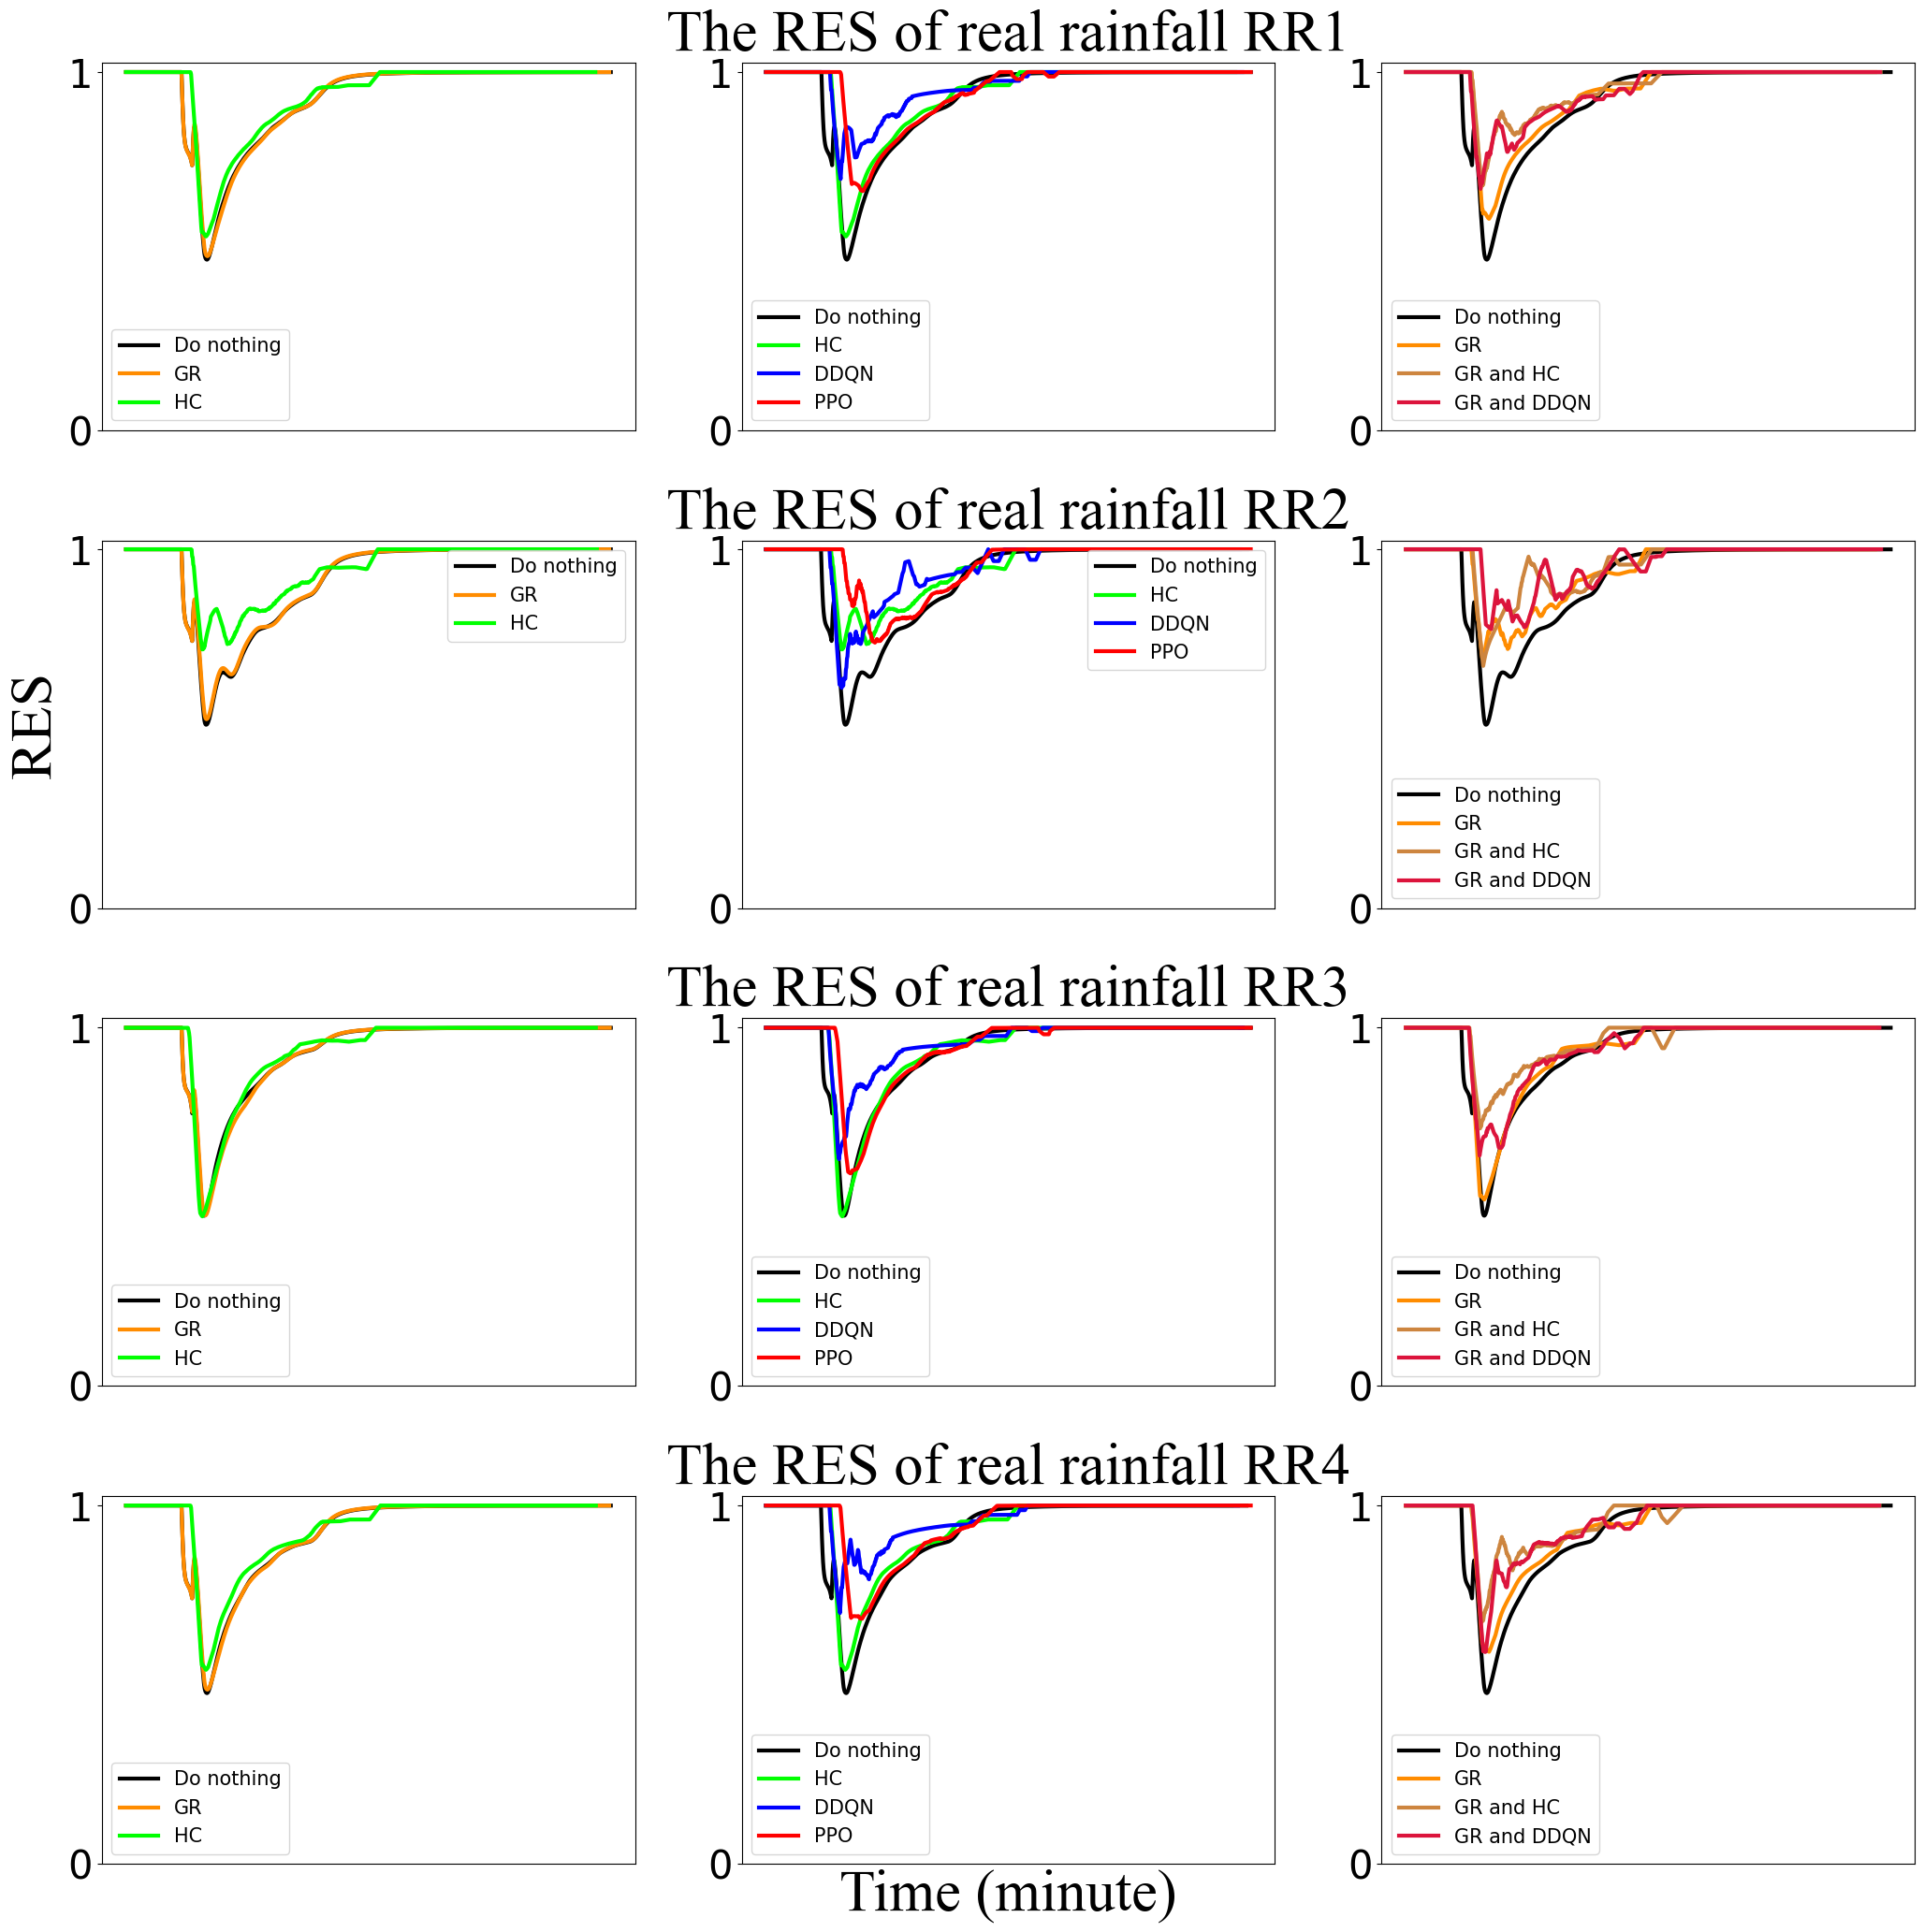

In [10]:
# RR的所有控制过程数据： 

font1 = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':45,
}

items=[['./Step3_1_S1-S8/S12/Results/RR/','./Step3_1_S1-S8/S34_GR/Results/RR/','./Step3_1_S1-S8/S56_HC/HC/Results/RR/'],
       ['./Step3_1_S1-S8/S12/Results/RR/','./Step3_1_S1-S8/S56_HC/HC/Results/RR/','./Step4_RTC_DDQN_noGI/DDQN/Results/RR/','./Step4_RTC_PPO_noGI/PPO/Results/RR/'],
       ['./Step3_1_S1-S8/S12/Results/RR/','./Step3_1_S1-S8/S78_GRHC/HC/Results/RR/','./Step4_RTC_DDQN/DDQN/Results/RR/','./Step4_RTC_PPO/PPO/Results/RR/']
]

names=[['Do nothing','GR','HC'],
       ['Do nothing','HC','DDQN','PPO'],
       ['Do nothing','GR','GR and HC','GR and DDQN','GR and PPO']
]
colors=[['#000000','#FF8C00','#00FF00'],
        ['#000000','#00FF00','#0000FF','#FF0000'],
        ['#000000','#FF8C00','#CD853F','#DC143C','#C000C0']]

legends=[['Do nothing','GR','HC'],
         ['Do nothing','HC','DDQN','PPO'],
         ['Do nothing','GR','GR and HC','GR and DDQN','GR and PPO']
]

fig,ax=plt.subplots(4,3,figsize=(25,25))
i,j=0,0
for i in range(4):

    #3张图，S1+S3+S5，说明GI与RTC分别作用；S1+S5+S9+S11对比3种RTC；S3+S7+S13+S15单靠GI不好用
    for j in range(3):
        max_num=0.0
        for s in range(len(items[j])):

            #if items[j][s] =='./Step3_1_S1-S8/S56_HC/HC/Results/RR/' or items[j][s] =='./Step3_1_S1-S8/S78_GRHC/HC/Results/RR/' :
            #     data=np.load(items[j][s]+str(i)+'.npy',allow_pickle=True).tolist()
            #     te=np.array(data['RES'][0:-1:3])
            #else:
            data=np.load(items[j][s]+str(i)+'.npy',allow_pickle=True).tolist()
            te=np.array(data['RES'])
            
            #取时均
            tte=[1 for _ in range(24)]
            for it in range(24,te.shape[0]-10):
                tte.append(np.mean(te[it-10:it+10]))
            te=np.array(tte)
            ax[i][j].plot(te, label=names[j][s], linewidth=3, color=colors[j][s])
            ax[i][j].legend(fontsize=15)
            #if legends_log[legends[j][s]]:
            #    ax[i][j].plot(te, linewidth=3, color=colors[j][s])
            #else:
            #    ax[i][j].plot(te, label=names[j][s], linewidth=3, color=colors[j][s])
            #    legends_log[legends[j][s]]=True
            max_num=np.max([max_num,np.max(te)])
        #ax[i][j].legend(fontsize=20)
        ax[i][j].tick_params(axis='y',labelsize=30)
        ax[i][j].tick_params(axis='x',labelsize=30)
        if j == 1:
            ax[i][j].set_title('The RES of real rainfall RR'+str(i+1),font=font1)
        if i == 5:
            ax[i][j].set_xticks([0,480],[0,480])
        else:
            ax[i][j].set_xticks([])
        ax[i][j].set_yticks([0,1],[0,1])

    #fig.legend(fontsize=30,loc='lower center',ncol=8)

    if i==1:
        ax[i][0].set_ylabel('RES',font=font1)

    if i ==3:
        ax[i][1].set_xlabel('Time (minute)',font=font1)
    
plt.subplots_adjust(hspace=0.3)
plt.savefig('./Figs/RES_RR.tif',dpi=100,bbox_inches='tight')

# Storage图

In [10]:
def get_storage1(file):
    rpt = read_rpt_file(file)
    storage_pipe = rpt.flow_routing_continuity['Final Stored Volume']['Volume_hectare-m']
    return storage_pipe

def get_storage2(file):
    rpt = read_rpt_file(file)
    storage_LID = rpt.runoff_quantity_continuity['Final Storage']['Volume_hectare-m']
    return storage_LID

# 按降雨划分出柱状图

In [11]:
results={}
#For RSH
for j in range(6):
    tem={
            'Do'+'\n'+'nothing':'./Step3_1_S1-S8/S12/Results/RSH/chaohu_rain_'+str(j)+'.rpt',
            'HC':'./Step3_1_S1-S8/S56_HC/HC/_temtestinp/RSH/chaohu_RTC'+str(j)+'_GI_rain.rpt',
            'DDQN':'./Step4_RTC_DDQN_noGI/DDQN/_temtestinp/RSH/chaohu_RTC'+str(j)+'_GI_rain.rpt',
            'PPO':'./Step4_RTC_PPO_noGI/PPO/_temtestinp/RSH/chaohu_RTC'+str(j)+'_GI_rain.rpt',
            'GR':'./Step3_1_S1-S8/S34_GR/Results/RSH/chaohu_rain_'+str(j)+'.rpt',
            'GR'+'\n'+'and'+'\n'+'HC':'./Step3_1_S1-S8/S78_GRHC/HC/_temtestinp/RSH/chaohu_RTC'+str(j)+'_GI_rain.rpt',
            'GR'+'\n'+'and'+'\n'+'DDQN':'./Step4_RTC_DDQN/DDQN/_temtestinp/RSH/chaohu_GI_RTC'+str(j)+'_GI_rain.rpt',
            'GR'+'\n'+'and'+'\n'+'PPO':'./Step4_RTC_PPO/PPO/_temtestinp/RSH/chaohu_GI_RTC'+str(j)+'_GI_rain.rpt',
    }
    results['RSH'+str(j)]=tem

#For RR
for j in range(4):
    tem={
            'Do'+'\n'+'nothing':'./Step3_1_S1-S8/S12/Results/RR/chaohu_rain_'+str(j)+'.rpt',
            'HC':'./Step3_1_S1-S8/S56_HC/HC/_temtestinp/RR/chaohu_RTC'+str(j)+'_GI_rain.rpt',
            'DDQN':'./Step4_RTC_DDQN_noGI/DDQN/_temtestinp/RR/chaohu_RTC'+str(j)+'_GI_rain.rpt',
            'PPO':'./Step4_RTC_PPO_noGI/PPO/_temtestinp/RR/chaohu_RTC'+str(j)+'_GI_rain.rpt',
            'GR':'./Step3_1_S1-S8/S34_GR/Results/RR/chaohu_rain_'+str(j)+'.rpt',
            'GR'+'\n'+'and'+'\n'+'HC':'./Step3_1_S1-S8/S78_GRHC/HC/_temtestinp/RR/chaohu_RTC'+str(j)+'_GI_rain.rpt',
            'GR'+'\n'+'and'+'\n'+'DDQN':'./Step4_RTC_DDQN/DDQN/_temtestinp/RR/chaohu_GI_RTC'+str(j)+'_GI_rain.rpt',
            'GR'+'\n'+'and'+'\n'+'PPO':'./Step4_RTC_PPO/PPO/_temtestinp/RR/chaohu_GI_RTC'+str(j)+'_GI_rain.rpt',
    }
    results['RR'+str(j)]=tem
    

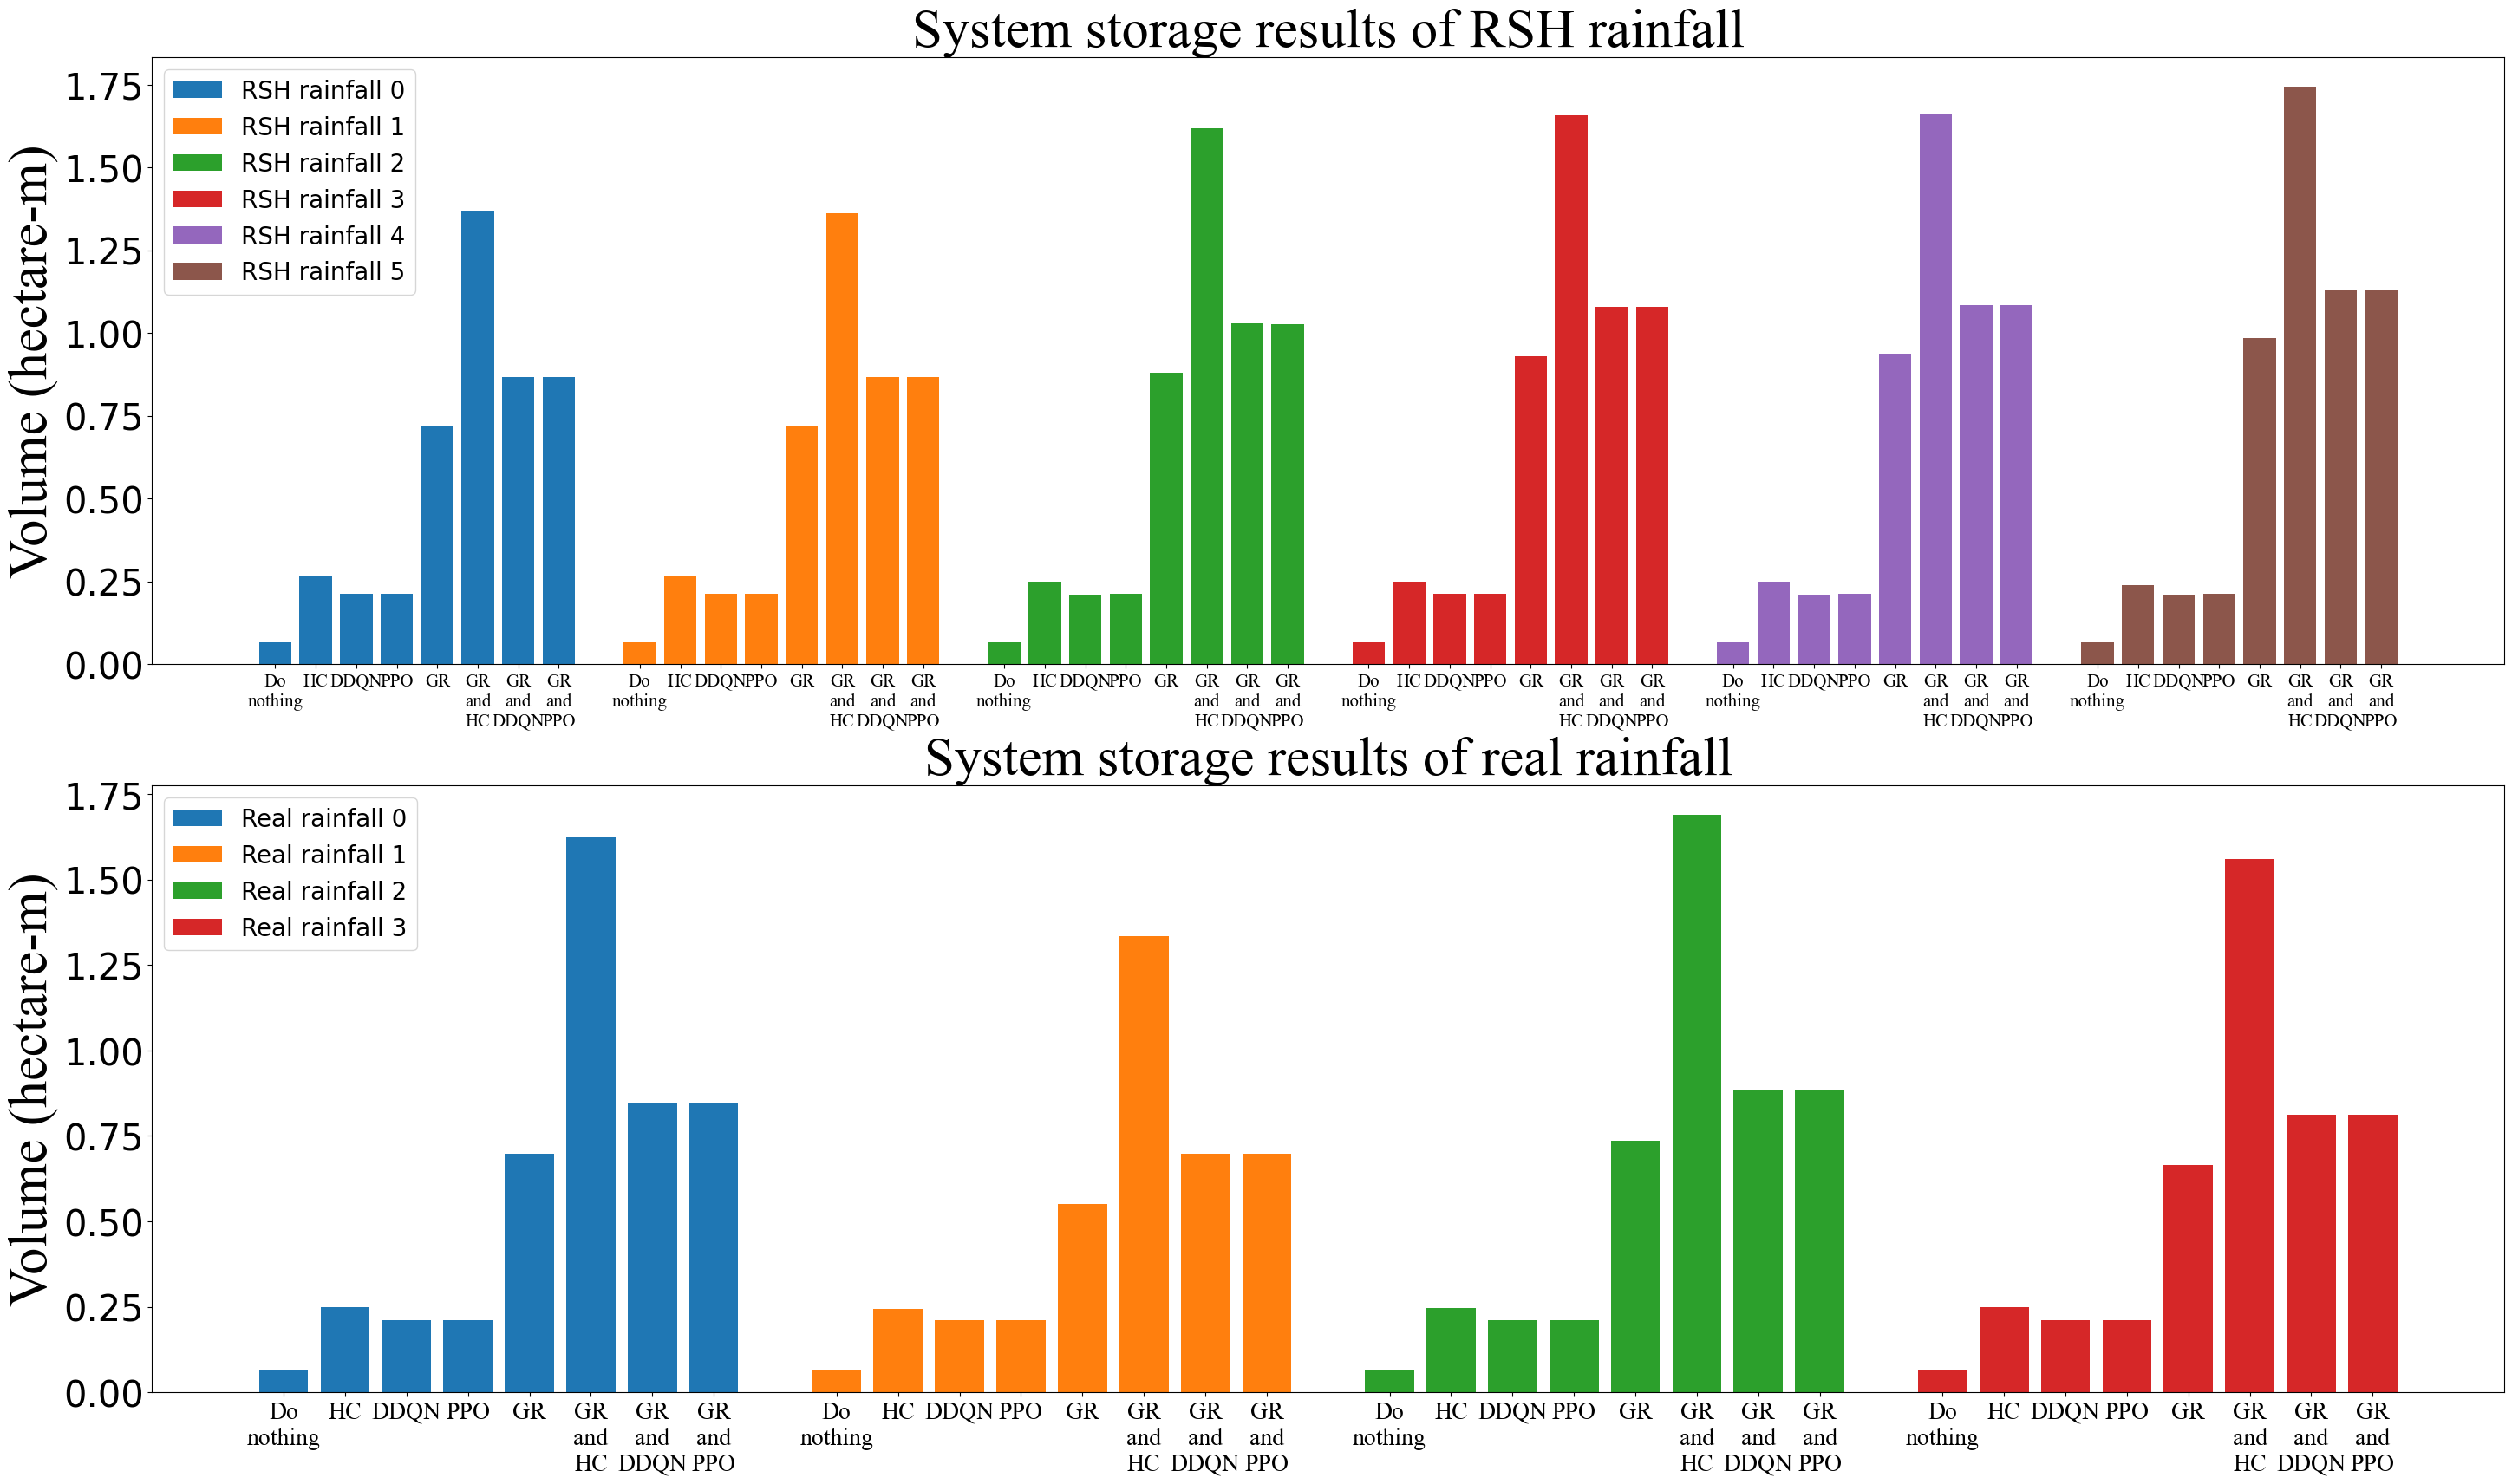

In [12]:
font1 = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':45,
}
font2 = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':20,
}
font3 = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':15,
}
fig,ax=plt.subplots(2,1,figsize=(35,20))

k=0
step1,step2=5,3
xtotal=[]
nametotal=[]
for j in range(6):
    it = 'RSH'+str(j)
    bartem=[]
    for fkey in results[it].keys():
        f = results[it][fkey]
        s = get_storage1(f) + get_storage2(f)#pipe+sub
        bartem.append(s)
        nametotal.append(fkey)
    x = [tem for tem in range(k,k+step1*len(bartem),step1)]
    xtotal+=x
    ax[0].bar(x,bartem,width=4*step1/5,label='RSH rainfall '+str(j))
    k=k+step1*len(bartem)+step1
ax[0].set_xticks(xtotal,nametotal,font=font2)
ax[0].set_title('System storage results of RSH rainfall',font=font1)
ax[0].set_xticks(xtotal,nametotal,font=font3)
ax[0].set_ylabel('Volume (hectare-m)',font=font1)
ax[0].tick_params(axis='y',labelsize=30)
ax[0].legend(fontsize=20)

k=0
xtotal=[]
nametotal=[]
for j in range(4):
    it = 'RR'+str(j)
    bartem=[]
    for fkey in results[it].keys():
        f = results[it][fkey]
        s = get_storage1(f) + get_storage2(f)#pipe+sub
        bartem.append(s)
        nametotal.append(fkey)
    x = [tem for tem in range(k,k+step2*len(bartem),step2)]
    xtotal+=x
    ax[1].bar(x,bartem,width=4*step2/5,label='Real rainfall '+str(j))
    k=k+step2*len(bartem)+step2
ax[1].set_xticks(xtotal,nametotal,font=font2)
ax[1].set_ylabel('Volume (hectare-m)',font=font1)
ax[1].set_title('System storage results of real rainfall',font=font1)
ax[1].tick_params(axis='y',labelsize=30)
ax[1].legend(fontsize=20)

plt.savefig('./Figs/storage.tif',dpi=100,bbox_inches='tight')